In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

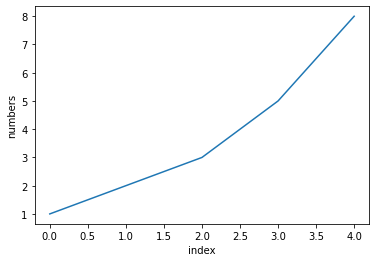

In [4]:
plt.plot([1, 2, 3, 5, 8])
plt.ylabel('numbers')
plt.xlabel('index')

plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

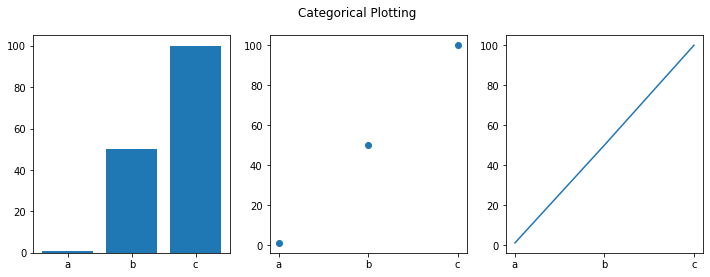

In [5]:
alphabet = ['a', 'b', 'c']
values = [1, 50, 100]

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(alphabet, values)
plt.subplot(1,3,2)
plt.scatter(alphabet, values)
plt.subplot(133)
plt.plot(alphabet, values)
plt.suptitle('Categorical Plotting')

In [6]:
data = pd.read_csv("BIPA_data.csv", index_col = 0)

In [7]:
data1_10 = data[data['championId'].isin(range(0,10))]
group1_10 = data1_10.groupby("championId", as_index = False).mean()

In [11]:
data1_10

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,...,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
14,5383880007,2021-08-11 07:02:38,S352,M,200,33220626,7,LOSE,9,1,...,17659,0,2,9,5042,0,0,MIDDLE,1202,11.16.390.1945
36,5383880023,2021-08-11 07:13:08,G230,T,200,50160666,8,LOSE,14,2,...,21044,0,0,13,7630,101,101,TOP,1611,11.16.390.1945
68,5383880039,2021-08-11 07:25:11,D416,M,200,82943928,7,WIN,16,12,...,21044,0,8,26,15833,7736,1249,MIDDLE,2156,11.16.390.1945
71,5383880040,2021-08-11 07:14:33,B471,J,100,3385419,6,LOSE,13,2,...,18807,4,74,28,17689,7497,0,JUNGLE,1535,11.16.390.1945
93,5383880046,2021-08-11 07:05:21,S120,T,200,65530457,8,LOSE,8,1,...,11651,0,0,3,3221,0,0,NONE,930,11.16.390.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999897,5384659588,2021-08-11 17:10:49,P40,M,100,53140515,4,WIN,17,9,...,19530,5,25,11,7539,12910,9479,MIDDLE,1806,11.16.390.1945
999920,5384659612,2021-08-11 17:06:30,S191,J,200,2403460,5,LOSE,12,0,...,26321,0,81,13,11826,7533,0,JUNGLE,1548,11.16.390.1945
999935,5384659615,2021-08-11 17:12:06,G112,M,100,50060129,7,WIN,17,7,...,23034,8,8,25,13790,8838,2703,MIDDLE,1868,11.16.390.1945
999946,5384659618,2021-08-11 17:13:59,S322,J,100,85547540,5,LOSE,15,6,...,38494,9,78,14,36546,19721,0,JUNGLE,1958,11.16.390.1945


<BarContainer object of 9 artists>

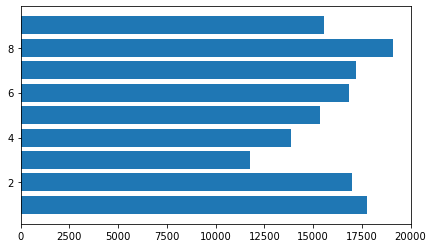

In [10]:
fig, ax = plt.subplots(figsize = (7, 4))
ax.barh(group1_10['championId'], group1_10['totalDamageDealtToChampions'])

In [12]:
# champion index 불러오기
import requests
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/'+champ_ver+'/data/en_US/champion.json'
request = requests.get(championJsonURL)
champion_data=request.json()
champion_data.keys()
champion_dict = {}
for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
champion_dict.keys()
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [13]:
champion

,champion
266,Aatrox
103,Ahri
84,Akali
166,Akshan
12,Alistar
...,...
238,Zed
115,Ziggs
26,Zilean
142,Zoe


In [14]:
group1_10 = pd.merge(group1_10, champion,
                        left_on = 'championId', right_index = True)

<BarContainer object of 9 artists>

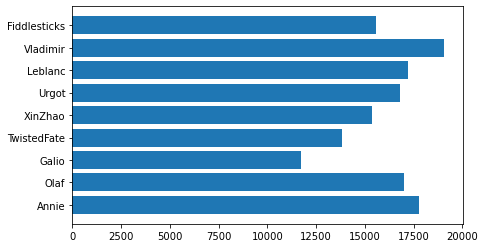

In [16]:
# y축 이름 변경
# 그래프를 이 코드로 그리는 것을 가장 권장
fig, ax = plt.subplots(figsize = (7, 4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])

<AxesSubplot:>

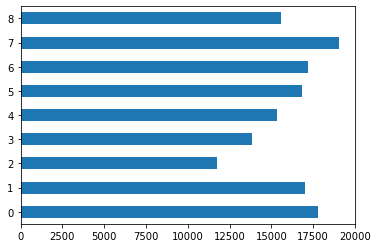

In [21]:
# dataframe에서 바로 그리기
group1_10['totalDamageDealtToChampions'].plot(kind = 'barh')

<AxesSubplot:ylabel='champion'>

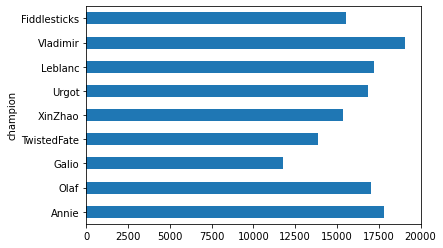

In [22]:
# 인덱스 변경
group1_10.index = group1_10.champion
group1_10['totalDamageDealtToChampions'].plot(kind = 'barh')

<BarContainer object of 9 artists>

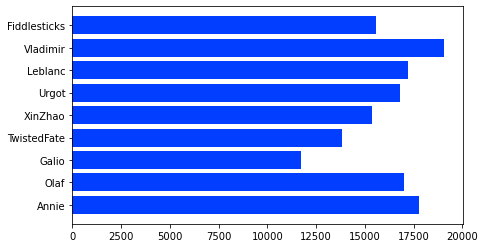

In [24]:
# 색상 변경(기본 설정)
sns.set_palette('bright')
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])

<BarContainer object of 9 artists>

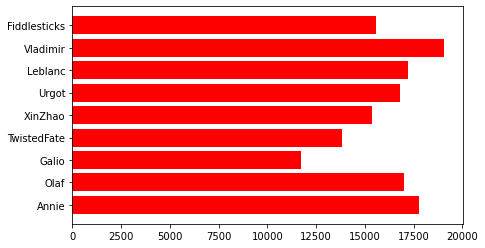

In [26]:
sns.set_palette('bright')
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'], color = 'red')

<AxesSubplot:xlabel='totalDamageDealtToChampions', ylabel='champion'>

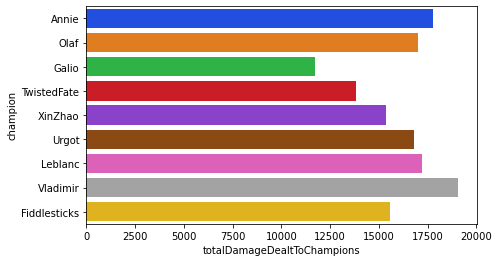

In [27]:
# seaborn
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x = 'totalDamageDealtToChampions', y = 'champion')

Text(0.5, 1.0, 'Avg Champion Damage')

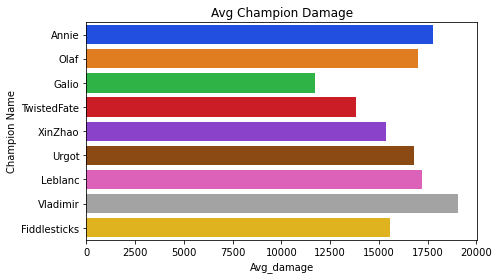

In [28]:
# xlabel, ylabel, title 변경
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data = group1_10, x = 'totalDamageDealtToChampions', y = 'champion')

ax.set_xlabel('Avg_damage')
ax.set_ylabel('Champion Name')
ax.set_title('Avg Champion Damage')

Text(0.5, 1.0, 'Avg Champion Damage')

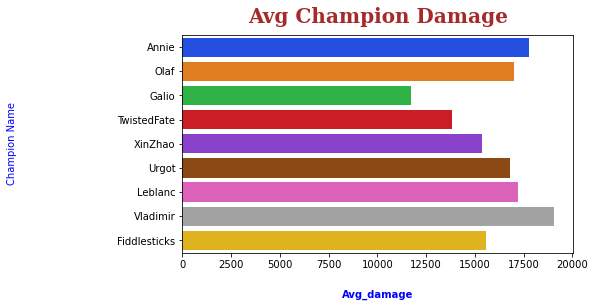

In [32]:
#font 변경
font_label = {
    'color' : 'blue',
    'weight' : 'bold'
}

font_title = {
    'family' : 'serif',
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'verticalalignment' : 'baseline',
    'horizontalalignment' : 'center'
}

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data = group1_10, x = 'totalDamageDealtToChampions', y = 'champion')

ax.set_xlabel('Avg_damage', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad = 100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)

Text(0.5, 1.0, 'Avg Champion Damage')

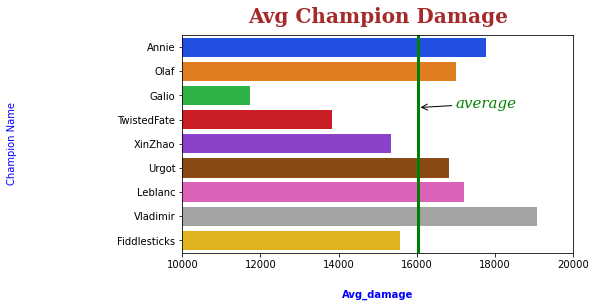

In [33]:
font_label = {
    'color' : 'blue',
    'weight' : 'bold'
}

font_title = {
    'family' : 'serif',
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'verticalalignment' : 'baseline',
    'horizontalalignment' : 'center'
}

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data = group1_10, x = 'totalDamageDealtToChampions', y = 'champion')
ax.set_xlim(10000, 20000)

damage_mean = group1_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls = '-', lw = 3, color = 'green')
arrowprops = {
    'arrowstyle' : '->'
}

ax.annotate("average", (damage_mean, 2.5),
           xytext = (17000, 2.5), color='green',
           fontfamily = 'serif', fontstyle = 'italic',
           fontsize = 15, arrowprops = arrowprops)

ax.set_xlabel('Avg_damage', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad = 100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)

In [34]:
group_data = data[data['gameLength'] > 1200].groupby(
    ['position', 'championId'], as_index = False).mean()

<AxesSubplot:xlabel='position', ylabel='totalDamageDealtToChampions'>

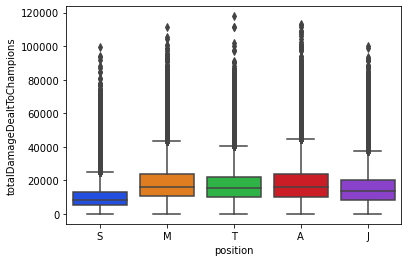

In [35]:
sns.boxplot(y = data['totalDamageDealtToChampions'], x = data['position'])

<AxesSubplot:xlabel='position', ylabel='totalDamageDealtToChampions'>

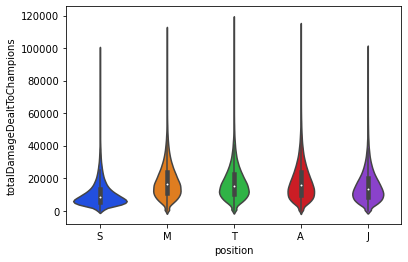

In [36]:
sns.violinplot(y = data['totalDamageDealtToChampions'],
              x = data['position'])

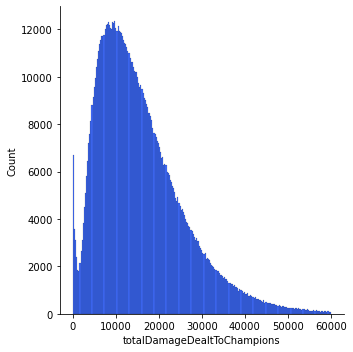

In [37]:
sns.displot(data[data['totalDamageDealtToChampions'] < 60000]
           ['totalDamageDealtToChampions'])

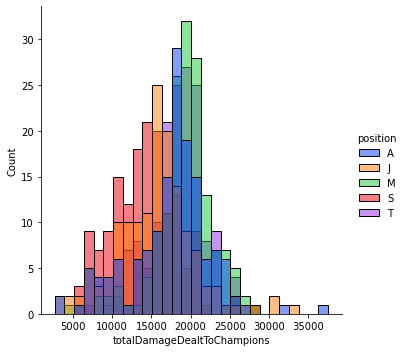

In [38]:
sns.displot(group_data, x = 'totalDamageDealtToChampions',
           hue = 'position')

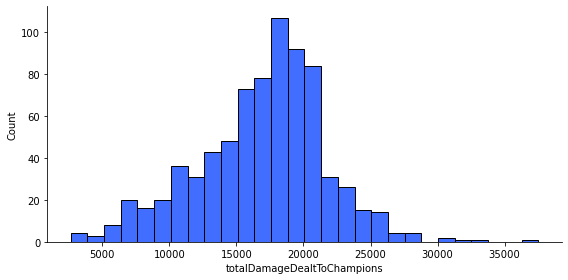

In [39]:
sns.displot(group_data['totalDamageDealtToChampions'],
           height = 4, aspect = 2)

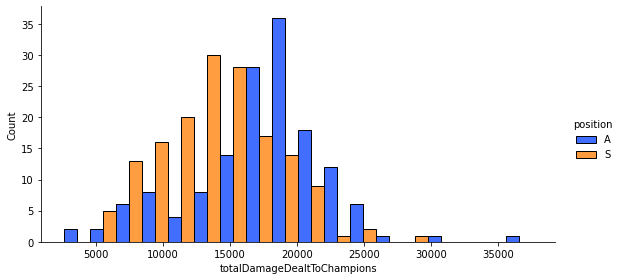

In [40]:
# 원딜과 서폿 딜량 비교
sns.displot(group_data[group_data['position'].isin(['A', 'S'])],
           x = 'totalDamageDealtToChampions', hue = 'position', 
           multiple = 'dodge', height = 4, aspect = 2)

In [41]:
champ_stats = pd.read_csv("champ_stats.csv")

In [42]:
# 그웬까지 챔피언 데이터 있음
champ_stats

,championId,championName,versionIndex,version,hp,hpperlevel,mp,mpperlevel,movespeed,armor,...,attackspeed,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,1,Annie,11.17,11.17.394.4489,524.0,88,418.0,25.0,335,19,...,0.579,2020.0,843.0,87.00,38.50,14.85,21.60,0,94.71,0.7129
1,2,Olaf,11.17,11.17.394.4489,575.0,100,316.0,42.0,350,35,...,0.694,2275.0,1030.0,86.00,53.25,23.80,17.70,0,127.50,1.0125
2,3,Galio,11.17,11.17.394.4489,562.0,112,500.0,40.0,335,24,...,0.625,2466.0,1180.0,83.50,53.25,21.60,21.40,0,118.50,0.7844
3,4,TwistedFate,11.17,11.17.394.4489,534.0,94,333.0,39.0,330,21,...,0.651,2132.0,996.0,74.55,38.50,15.70,21.60,0,108.10,1.0074
4,5,XinZhao,11.17,11.17.394.4489,570.0,92,274.0,55.0,345,35,...,0.645,2134.0,1209.0,94.50,53.25,19.90,14.91,0,114.00,1.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,555,Pyke,11.17,11.17.394.4489,600.0,90,415.0,50.0,330,45,...,0.667,2130.0,1265.0,104.50,53.25,15.50,25.00,0,96.00,0.9505
152,777,Yone,11.17,11.17.394.4489,550.0,85,500.0,0.0,345,28,...,0.625,1995.0,500.0,85.80,53.25,20.25,0.00,0,94.00,0.9969
153,875,Sett,11.17,11.17.394.4489,600.0,93,0.0,0.0,340,33,...,0.625,2181.0,0.0,101.00,53.25,15.50,0.00,0,128.00,0.8109
154,876,Lillia,11.17,11.17.394.4489,580.0,90,410.0,50.0,330,22,...,0.625,2110.0,1260.0,90.00,44.75,20.25,27.65,0,113.70,0.9119


<AxesSubplot:xlabel='hp', ylabel='hp_18'>

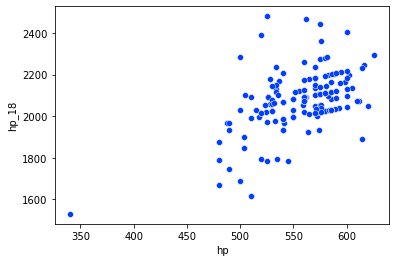

In [43]:
# 1레벨과 18레벨 체력 비교
sns.scatterplot(data = champ_stats, x = 'hp', y = 'hp_18')